# Application A

In [18]:
import yaml
import copy
import os
import numpy as np
import matplotlib.pyplot as plt
from pychromatic import Multiplot
from pychromatic.colors import accent

## Size convergence

Create input files

In [2]:
with open("input.yaml","r") as fin:
    inp = yaml.load(fin, Loader=yaml.FullLoader)

Modify the potential path

In [3]:
potential = os.path.join(os.getcwd(), "Fe.eam")
inp["md"]["pair_coeff"] = "* * %s"%potential

In [4]:
for i in range(3, 16):
    inp['calculations'][0]['repeat'] = [i,i,i]
    folder = os.path.join(os.getcwd(), "size_%i"%i)
    os.mkdir(folder)
    inpfile = os.path.join(folder, "input.yaml")
    with open(inpfile, "w") as fout:
        yaml.dump(inp, fout)

Gather results

In [5]:
natoms = []
fe = []

for i in range(4, 16):
    result_file = os.path.join(os.getcwd(), "size_%i"%i, "fe-BCC-1000-0/report.yaml")
    with open(result_file, "r") as fin:
        result = yaml.load(fin, Loader=yaml.FullLoader)
    natoms.append(i**3*2)
    fe.append(result["results"]["free_energy"])

Text(0, 0.5, '$\\Delta G$ (eV/atom)')

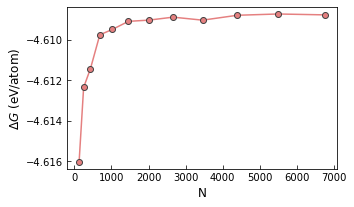

In [16]:
mlt = Multiplot(width=350)
mlt[0, 0].plot(natoms, fe, "-", color=accent["pred"])
mlt[0, 0].plot(natoms, fe, "o", color=accent["pred"],
              markeredgecolor=accent["dgrey"])
mlt[0, 0].set_xlabel("N", fontsize=12)
mlt[0, 0].set_ylabel(r"$\Delta G$ (eV/atom)", fontsize=12)

Get value at thermodynamic limit

In [21]:
natoms = np.array(natoms)
fe = np.array(fe)

fit = np.polyfit(1/natoms, fe, 1)
one_over_natoms = 1/natoms
one_over_natoms_fit = np.linspace(min(one_over_natoms), 
                                  max(one_over_natoms), 1000)
fe_fit = np.polyval(fit, one_over_natoms_fit)

Text(0, 0.5, '$G$ (eV/atom)')

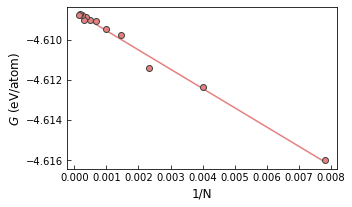

In [31]:
mlt = Multiplot(width=350)
mlt[0, 0].plot(one_over_natoms_fit, fe_fit, "-", color=accent["pred"])
mlt[0, 0].plot(one_over_natoms, fe, "o", color=accent["pred"],
              markeredgecolor=accent["dgrey"])
mlt[0, 0].set_xlabel("1/N", fontsize=12)
mlt[0, 0].set_ylabel(r"$G$ (eV/atom)", fontsize=12)

At thermodynamic limit

In [25]:
fit

array([-0.96040197, -4.60859334])

In [26]:
fe_inf = fit[1]
fe_inf

-4.608593337189308

Replot 

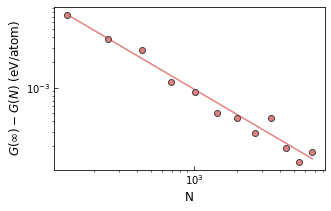

In [32]:
mlt = Multiplot(width=350)
mlt[0, 0].plot(1/one_over_natoms_fit, fe_inf-fe_fit, "-", color=accent["pred"])
mlt[0, 0].plot(natoms, fe_inf-fe, "o", color=accent["pred"],
              markeredgecolor=accent["dgrey"])
mlt[0, 0].set_xlabel("N", fontsize=12)
mlt[0, 0].set_ylabel(r"$G(\infty) - G(N)$ (eV/atom)", fontsize=12)
mlt[0,0].set_xscale('log')
mlt[0,0].set_yscale('log')

## Time convergence

Create input files

In [49]:
times = np.array([1000, 1500, 2000, 2500, 3000, 
                  4000, 5000, 8000, 10000, 15000, 
                  25000, 50000, 75000, 100000, 500000, 
                  1000000, 2000000, 3000000, 4000000, 5000000,
                  6000000, 7000000, 8000000])

In [42]:
with open("input.yaml","r") as fin:
    inp = yaml.load(fin, Loader=yaml.Full.icams.rub.deLoader)

Modify the potential path

In [43]:
potential = os.path.join(os.getcwd(), "Fe.eam")
inp["md"]["pair_coeff"] = "* * %s"%potential

In [44]:
for count, time in enumerate(times):
    inp['calculations'][0]['repeat'] = [15, 15, 15]
    inp["md"]["ts"] = int(time)
    folder = os.path.join(os.getcwd(), "time_%d"%count)
    os.mkdir(folder)
    inpfile = os.path.join(folder, "input.yaml")
    with open(inpfile, "w") as fout:
        yaml.dump(inp, fout)

gather results

In [51]:
fe = []

for count, time in enumerate(times):
    result_file = os.path.join(os.getcwd(), "time_%d"%count, "fe-BCC-1000-0/report.yaml")
    with open(result_file, "r") as fin:
        result = yaml.load(fin, Loader=yaml.FullLoader)
    fe.append(result["results"]["free_energy"])

In [52]:
time_in_ps = times*0.001*1000

Text(0, 0.5, '$G(N=6750)$ (eV/atom)')

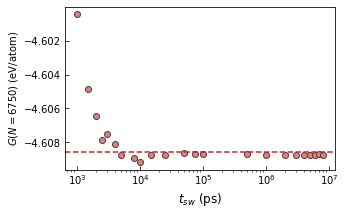

In [60]:
mlt = Multiplot(width=350)
mlt[0, 0].plot(time_in_ps, fe, "o", color=accent["pred"],
              markeredgecolor=accent["dgrey"])
mlt[0, 0].set_xlabel("N", fontsize=12)
mlt[0, 0].set_ylabel(r"$G(\infty) - G(N)$ (eV/atom)", fontsize=12)
mlt[0,0].set_xscale('log')
mlt[0,0].axhline(fe_inf, color=accent["dred"], ls="dashed", label=r"$G(\infty)$")
mlt[0,0].set_xlabel(r"$t_{sw}$ (ps)", fontsize=12)
mlt[0,0].set_ylabel(r"$G(N=6750)$ (eV/atom)", fontsize=10)